In [10]:
%matplotlib notebook

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt

import recova.registration_result_database
from recova.util import kullback_leibler, bat_distance
from lieroy import se3

np.set_printoptions(precision=3)

In [12]:
def lie_to_group(lie_results):
    matrices_of_results = np.empty((len(lie_results), 4, 4))
    for i, result in enumerate(lie_results):
        matrices_of_results[i, :, :] = se3.exp(lie_results[i])
    return matrices_of_results

In [13]:
db = recova.registration_result_database.RegistrationPairDatabase('/home/dlandry/dataset/normal-estimates')
pairs = db.registration_pairs()


In [18]:
pair = db.get_registration_pair('hauptgebaude', 33, 32)
matrices_of_results = lie_to_group(pair.lie_matrix_of_results())

In [21]:
full_mean, full_cov = se3.gaussian_from_sample(matrices_of_results)
print(full_cov)

[[ 5.842e+00  5.692e-02  5.509e-01  9.084e-03 -1.050e+00  2.585e-01]
 [ 5.692e-02  3.570e+00 -1.201e+00  1.297e+00 -6.693e-02  3.340e-03]
 [ 5.509e-01 -1.201e+00  2.977e+00 -4.063e-01 -7.408e-02  5.677e-02]
 [ 9.084e-03  1.297e+00 -4.063e-01  6.974e-01 -1.035e-02 -5.331e-02]
 [-1.050e+00 -6.693e-02 -7.408e-02 -1.035e-02  6.739e-01  2.729e-02]
 [ 2.585e-01  3.340e-03  5.677e-02 -5.331e-02  2.729e-02  3.518e-01]]


<IPython.core.display.Javascript object>


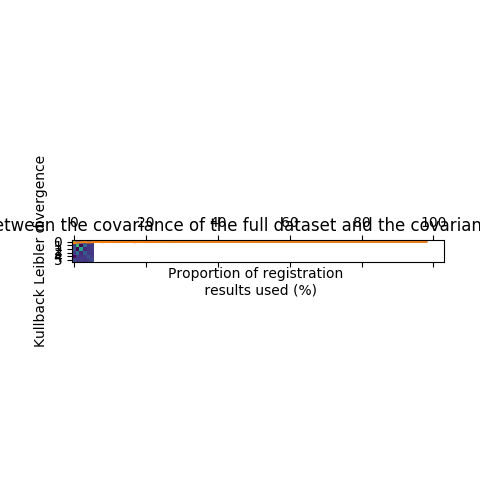

In [23]:
plt.matshoww(full_cov)

In [22]:
klls = []
inv_of_klls = []
bat_distances = []

for i in range(1, 100):
    mask_of_subsample = np.random.choice([True,False], len(matrices_of_results), p=[float(i) / 100., (100. - float(i)) / 100.])
    random_subsample = matrices_of_results[mask_of_subsample]
    print(len(random_subsample))
    
    partial_mean, partial_cov = se3.gaussian_from_sample(random_subsample)

    inv_of_kll = kullback_leibler(partial_cov, full_cov)
    inv_of_klls.append(inv_of_kll)
    print('Inv of kll: %f' % inv_of_kll)
    
    kll = kullback_leibler(full_cov, partial_cov)
    print('Kll: %f' % kll)
    klls.append(kll)

111
Inv of kll: 0.345882
Kll: 0.237803
210
Inv of kll: 0.213103
Kll: 0.162434
295
Inv of kll: 0.122765
Kll: 0.171484
412
Inv of kll: 0.069405
Kll: 0.083410
454
Inv of kll: 0.184607
Kll: 0.122432
596
Inv of kll: 0.100114
Kll: 0.077467
710
Inv of kll: 0.030235
Kll: 0.029696
769
Inv of kll: 0.024085
Kll: 0.027002
870
Inv of kll: 0.063655
Kll: 0.066981
1002
Inv of kll: 0.020635
Kll: 0.022569
1016
Inv of kll: 0.039509
Kll: 0.045123
1197
Inv of kll: 0.017111
Kll: 0.018457
1274
Inv of kll: 0.009940
Kll: 0.010439
1417
Inv of kll: 0.022714
Kll: 0.025079
1477
Inv of kll: 0.029650
Kll: 0.025735
1583
Inv of kll: 0.012391
Kll: 0.013525
1706
Inv of kll: 0.017377
Kll: 0.015868
1740
Inv of kll: 0.084801
Kll: 0.069970
1871
Inv of kll: 0.015871
Kll: 0.014730
1936
Inv of kll: 0.015387
Kll: 0.015885
2168
Inv of kll: 0.009657
Kll: 0.010189
2199
Inv of kll: 0.016719
Kll: 0.015073
2223
Inv of kll: 0.029958
Kll: 0.034647
2380
Inv of kll: 0.009986
Kll: 0.010328
2464
Inv of kll: 0.004529
Kll: 0.004651
2614
Inv 

<IPython.core.display.Javascript object>


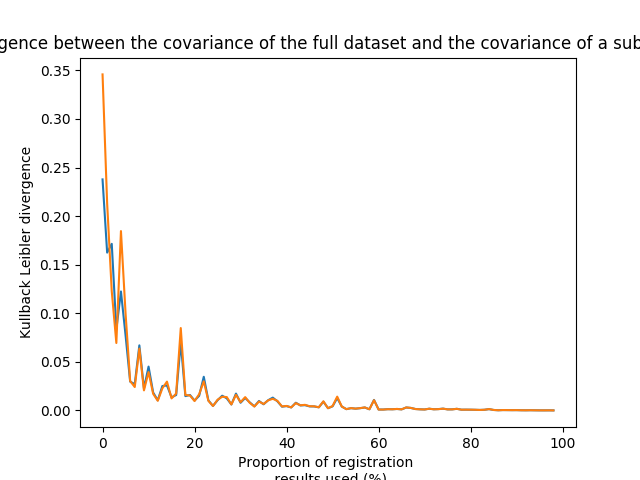

In [25]:
#plt.plot(matrix_norms)
plt.plot(klls, label='')
plt.plot(inv_of_klls, label='batt')
plt.xlabel('Proportion of registration \n results used (%)')
plt.ylabel('Kullback Leibler divergence')
plt.title('Divergence between the covariance of the full dataset and the covariance of a subsample')
plt.show()

In [ ]:
plt.matshow(full_cov)
print(full_cov[2,4])
print(full_cov[4,2])

In [ ]:
print(bat_distances)

In [ ]:
for pair in pairs:
    results = pair.lie_matrix_of_results()
    m_results = lie_to_group(results)
    mean, cov = se3.gaussian_from_sample(m_results)
    
    distance = np.linalg.norm(cov - cov.T)
    print(distance)
    
    if distance > 0.4:
        print(cov)